In [ ]:
! pip install -q "diffusers==0.32.2" "transformers==4.48.1" "accelerate==1.3.0" "bitsandbytes==0.45.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import login
from google.colab import userdata

In [ ]:
login(token=userdata.get('niru_hf_read'))

In [ ]:
from diffusers import BitsAndBytesConfig as DiffusersBitsAndBytesConfig
from transformers import BitsAndBytesConfig as TransformersBitsAndBytesConfig

from diffusers import FluxTransformer2DModel
from transformers import T5EncoderModel
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

The **CLIPTextModel** and **AutoencoderKL** aren’t quantized because they’re already small in size.

In [ ]:
text_encoder_quant_config = TransformersBitsAndBytesConfig(load_in_4bit=True,)

text_encoder_2_4bit = T5EncoderModel.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    subfolder="text_encoder_2",
    quantization_config=text_encoder_quant_config,
    torch_dtype=torch.float16,
)

transformer_quant_config = DiffusersBitsAndBytesConfig(load_in_4bit=True,)

transformer_4bit = FluxTransformer2DModel.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    subfolder="transformer",
    quantization_config=transformer_quant_config,
    torch_dtype=torch.float16,
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


text_encoder_2/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

transformer/config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

In [ ]:
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    transformer=transformer_4bit,
    text_encoder_2=text_encoder_2_4bit,
    torch_dtype=torch.float16,
).to("cuda")

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_2/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [ ]:
pipe_kwargs = {
    "prompt": "A pendulum in motion, demonstrating periodic motion as it swings back and forth due to gravitational force. The displacement and potential energy are highest at the endpoints, while kinetic energy is maximum at the lowest point",
    "height": 1024,
    "width": 1024,
    "guidance_scale": 3.5,
    "num_inference_steps": 20,
    "max_sequence_length": 512,
}

image = pipe(**pipe_kwargs, generator=torch.manual_seed(0),).images[0]

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:446: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference.
  warnings.warn(


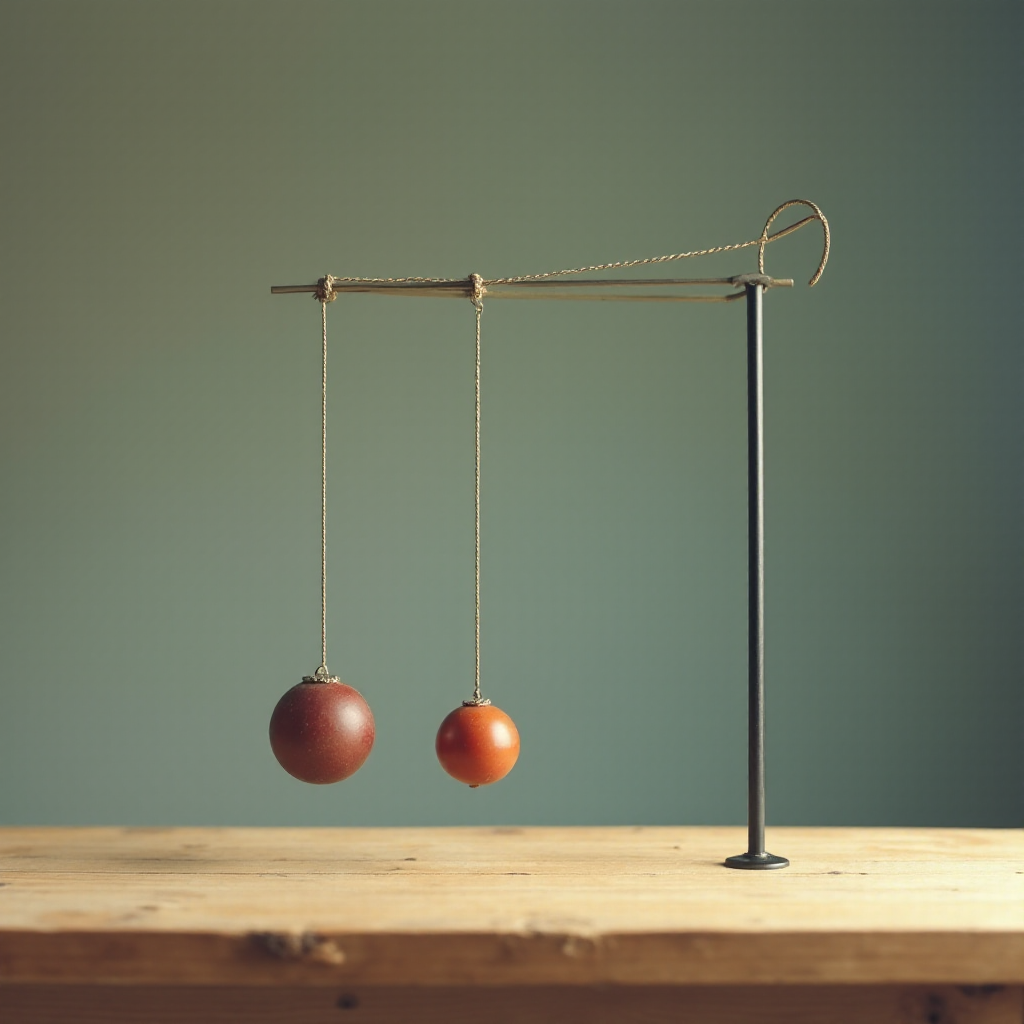

In [ ]:
image

In [ ]:
pipe

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}